## Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Datasets

In [2]:
Unemployment_df = pd.read_csv('1. unemployment-rate-men-vs-women.csv')
Strategy_df = pd.read_csv('2. national-strategy-for-youth-employment.csv')
Education_df = pd.read_csv('3. share-of-education-in-government-expenditure.csv')
Electricity_df = pd.read_csv('4. share-of-the-population-with-access-to-electricity.csv')
Firms_df = pd.read_excel('5. Total_firms_Historical_data.xlsx')
Codes_df = pd.read_csv('6. Country Codes.csv')

## Data Cleaning

### Unemployment Rate

In [3]:
# View the first 5 rows
Unemployment_df.head()

,Entity,Code,Year,"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1991,13.615,10.089,10745168.0,NaN
2,Afghanistan,AFG,1992,13.816,10.258,12057436.0,NaN
3,Afghanistan,AFG,1993,13.712,10.165,14003764.0,NaN
4,Afghanistan,AFG,1994,13.722,10.170,15455560.0,NaN


In [4]:
# Check the data information
Unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58578 entries, 0 to 58577
Data columns (total 7 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Entity                                                                 58578 non-null  object 
 1   Code                                                                   55049 non-null  object 
 2   Year                                                                   58578 non-null  int64  
 3   Unemployment, female (% of female labor force) (modeled ILO estimate)  6231 non-null   float64
 4   Unemployment, male (% of male labor force) (modeled ILO estimate)      6231 non-null   float64
 5   Population (historical estimates)                                      58252 non-null  float64
 6   Continent                                                              285 non-null    

In [5]:
# Check for Duplicates
Unemployment_df.duplicated().sum()

0

In [6]:
# Check for Missing Values
Unemployment_df.isna().sum()

Entity                                                                       0
Code                                                                      3529
Year                                                                         0
Unemployment, female (% of female labor force) (modeled ILO estimate)    52347
Unemployment, male (% of male labor force) (modeled ILO estimate)        52347
Population (historical estimates)                                          326
Continent                                                                58293
dtype: int64

In [7]:
# Rename columns 
Unemployment_df.rename(columns = {'Unemployment, female (% of female labor force) (modeled ILO estimate)':'Unemployment (F)',
                    'Unemployment, male (% of male labor force) (modeled ILO estimate)':'Unemployment (M)',
                    'Population (historical estimates)':'Population'}, inplace = True)

In [8]:
# check the rows with missing unemployment rate for male and female
Unemployment_df[(Unemployment_df['Unemployment (M)'].isna()) & (Unemployment_df['Unemployment (F)'].isna())]


,Entity,Code,Year,Unemployment (F),Unemployment (M),Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
32,Afghanistan,AFG,-10000,NaN,NaN,14737.0,NaN
33,Afghanistan,AFG,-9000,NaN,NaN,20405.0,NaN
34,Afghanistan,AFG,-8000,NaN,NaN,28253.0,NaN
35,Afghanistan,AFG,-7000,NaN,NaN,39120.0,NaN
...,...,...,...,...,...,...,...
58573,Zimbabwe,ZWE,1986,NaN,NaN,8983048.0,NaN
58574,Zimbabwe,ZWE,1987,NaN,NaN,9277484.0,NaN
58575,Zimbabwe,ZWE,1988,NaN,NaN,9568745.0,NaN
58576,Zimbabwe,ZWE,1989,NaN,NaN,9846352.0,NaN


In [9]:
'''The unemployment rates for both male and female are missing for 52,347 rows. Filling these missing rows will 
lead to bias and skew the dataset. Hence, the need to drop thes rows.'''

Unemployment_df = Unemployment_df.dropna(subset = ['Unemployment (F)', 'Unemployment (M)'])

In [10]:
# Creating a new column for unemployment rate using the average of female and male unemployment rates
Unemployment_df['Unemployment Rate'] = Unemployment_df[['Unemployment (F)', 'Unemployment (M)']].mean(axis = 1)

In [11]:
'''For the missing rows in continent, merge the unemployment and codes dataframe. Before merging, 
some columns to be renamed in the codes dataframe to match the column names in the unemployment table '''

Codes_df.rename(columns = {'alpha-3': 'Code', 'name':'Economy'}, inplace = True)

In [12]:
# Merge the unemployment and the country code df to have the region and subregion
Unemployment_df1 = Unemployment_df.merge(Codes_df, on = 'Code', how = 'inner')

In [13]:
Unemployment_df1

,Entity,Code,Year,Unemployment (F),Unemployment (M),Population,Continent,Unemployment Rate,Economy,alpha-2,country-code,region,sub-region
0,Afghanistan,AFG,1991,13.615,10.089,10745168.0,NaN,11.8520,Afghanistan,AF,4,Asia,Southern Asia
1,Afghanistan,AFG,1992,13.816,10.258,12057436.0,NaN,12.0370,Afghanistan,AF,4,Asia,Southern Asia
2,Afghanistan,AFG,1993,13.712,10.165,14003764.0,NaN,11.9385,Afghanistan,AF,4,Asia,Southern Asia
3,Afghanistan,AFG,1994,13.722,10.170,15455560.0,NaN,11.9460,Afghanistan,AF,4,Asia,Southern Asia
4,Afghanistan,AFG,1995,14.235,10.610,16418911.0,NaN,12.4225,Afghanistan,AF,4,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,Zimbabwe,ZWE,2017,5.192,4.353,14751101.0,NaN,4.7725,Zimbabwe,ZW,716,Africa,Sub-Saharan Africa
5762,Zimbabwe,ZWE,2018,5.206,4.360,15052191.0,NaN,4.7830,Zimbabwe,ZW,716,Africa,Sub-Saharan Africa
5763,Zimbabwe,ZWE,2019,5.248,4.393,15354606.0,NaN,4.8205,Zimbabwe,ZW,716,Africa,Sub-Saharan Africa
5764,Zimbabwe,ZWE,2020,5.791,4.890,15669663.0,NaN,5.3405,Zimbabwe,ZW,716,Africa,Sub-Saharan Africa


In [14]:
# Removing the unwanted columns from the merged dataframe
Unemployment_df1 = Unemployment_df1.drop(columns = {'Continent', 'Economy', 'alpha-2', 'country-code'})

In [15]:
Unemployment_df1

,Entity,Code,Year,Unemployment (F),Unemployment (M),Population,Unemployment Rate,region,sub-region
0,Afghanistan,AFG,1991,13.615,10.089,10745168.0,11.8520,Asia,Southern Asia
1,Afghanistan,AFG,1992,13.816,10.258,12057436.0,12.0370,Asia,Southern Asia
2,Afghanistan,AFG,1993,13.712,10.165,14003764.0,11.9385,Asia,Southern Asia
3,Afghanistan,AFG,1994,13.722,10.170,15455560.0,11.9460,Asia,Southern Asia
4,Afghanistan,AFG,1995,14.235,10.610,16418911.0,12.4225,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...
5761,Zimbabwe,ZWE,2017,5.192,4.353,14751101.0,4.7725,Africa,Sub-Saharan Africa
5762,Zimbabwe,ZWE,2018,5.206,4.360,15052191.0,4.7830,Africa,Sub-Saharan Africa
5763,Zimbabwe,ZWE,2019,5.248,4.393,15354606.0,4.8205,Africa,Sub-Saharan Africa
5764,Zimbabwe,ZWE,2020,5.791,4.890,15669663.0,5.3405,Africa,Sub-Saharan Africa


### National Strategy for Youth Employment

In [16]:
# view the first few rows
Strategy_df.head()

,Entity,Code,Year,"8.b.1 - Existence of a developed and operationalized national strategy for youth employment, as a distinct strategy or as part of a national employment strategy - SL_CPA_YEMP"
0,Afghanistan,AFG,2019,1
1,Afghanistan,AFG,2020,1
2,Argentina,ARG,2019,0
3,Argentina,ARG,2020,0
4,Argentina,ARG,2021,3


In [17]:
# Check the info of the data
Strategy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 4 columns):
 #   Column                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                          --------------  ----- 
 0   Entity                                                                                                                                                                          363 non-null    object
 1   Code                                                                                                                                                                            363 non-null    object
 2   Year                                                                       

In [18]:
# Check for Duplicates
Strategy_df.duplicated().sum()

0

In [19]:
# Check for missing Values
Strategy_df.isna().sum()

Entity                                                                                                                                                                            0
Code                                                                                                                                                                              0
Year                                                                                                                                                                              0
8.b.1 - Existence of a developed and operationalized national strategy for youth employment, as a distinct strategy or as part of a national employment strategy - SL_CPA_YEMP    0
dtype: int64

In [20]:
# Rename Column
Strategy_df.rename(columns = {'8.b.1 - Existence of a developed and operationalized national strategy for youth employment, as a distinct strategy or as part of a national employment strategy - SL_CPA_YEMP':'Strategy'}, inplace = True)

In [21]:
# merge the strategy dataframe with country code dataframe
Strategy_df = Strategy_df.merge(Codes_df, on = 'Code', how = 'left')

In [22]:
# delete unwanted columns
Strategy_df = Strategy_df.drop(columns = {'Economy', 'alpha-2', 'country-code'})

In [23]:
# change datatype for strategy to str since it is a categorical variable
Strategy_df['Strategy'] = Strategy_df['Strategy'].astype('str')

In [24]:
Strategy_df

,Entity,Code,Year,Strategy,region,sub-region
0,Afghanistan,AFG,2019,1,Asia,Southern Asia
1,Afghanistan,AFG,2020,1,Asia,Southern Asia
2,Argentina,ARG,2019,0,Americas,Latin America and the Caribbean
3,Argentina,ARG,2020,0,Americas,Latin America and the Caribbean
4,Argentina,ARG,2021,3,Americas,Latin America and the Caribbean
...,...,...,...,...,...,...
358,Zambia,ZMB,2019,2,Africa,Sub-Saharan Africa
359,Zambia,ZMB,2020,2,Africa,Sub-Saharan Africa
360,Zambia,ZMB,2022,2,Africa,Sub-Saharan Africa
361,Zimbabwe,ZWE,2019,1,Africa,Sub-Saharan Africa


## Share of Education in Government Expenditure

In [25]:
# View first few rows
Education_df.head()

,Entity,Code,Year,"Government expenditure on education, total (% of government expenditure)"
0,Afghanistan,AFG,2005,15.08
1,Afghanistan,AFG,2006,12.88
2,Afghanistan,AFG,2007,12.36
3,Afghanistan,AFG,2008,16.65
4,Afghanistan,AFG,2009,17.31


In [26]:
# Check the info
Education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 4 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Entity                                                                    4104 non-null   object 
 1   Code                                                                      3809 non-null   object 
 2   Year                                                                      4104 non-null   int64  
 3   Government expenditure on education, total (% of government expenditure)  4104 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 128.4+ KB


In [27]:
# Check for Duplicates
Strategy_df.duplicated().sum()

0

In [28]:
# Check for Missing Values
Education_df.isna().sum()

Entity                                                                        0
Code                                                                        295
Year                                                                          0
Government expenditure on education, total (% of government expenditure)      0
dtype: int64

In [29]:
# Merge the Strategy data with code dataframe 
Education_df = Education_df.merge(Codes_df, on = 'Code', how = 'left')

In [30]:
Education_df.isna().sum()

Entity                                                                        0
Code                                                                        295
Year                                                                          0
Government expenditure on education, total (% of government expenditure)      0
Economy                                                                     316
alpha-2                                                                     335
country-code                                                                316
region                                                                      316
sub-region                                                                  316
dtype: int64

In [31]:
# Check the rows with missing Codes
Education_df[Education_df['Code'].isna()]

,Entity,Code,Year,"Government expenditure on education, total (% of government expenditure)",Economy,alpha-2,country-code,region,sub-region
1030,East Asia and Pacific (WB),NaN,2002,16.497230,NaN,NaN,NaN,NaN,NaN
1031,East Asia and Pacific (WB),NaN,2004,16.439480,NaN,NaN,NaN,NaN,NaN
1032,East Asia and Pacific (WB),NaN,2007,14.964565,NaN,NaN,NaN,NaN,NaN
1033,East Asia and Pacific (WB),NaN,2008,14.188846,NaN,NaN,NaN,NaN,NaN
1034,East Asia and Pacific (WB),NaN,2009,14.511420,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3984,Upper-middle-income countries,NaN,2016,14.927190,NaN,NaN,NaN,NaN,NaN
3985,Upper-middle-income countries,NaN,2017,14.669371,NaN,NaN,NaN,NaN,NaN
3986,Upper-middle-income countries,NaN,2018,14.443619,NaN,NaN,NaN,NaN,NaN
3987,Upper-middle-income countries,NaN,2019,14.134460,NaN,NaN,NaN,NaN,NaN


In [32]:
'''
    The rows with missing codes above are not countries like the other entities. Hence, there is no code for them.
    These rows can be deleted to take care of the missing values
'''

Education_df.dropna(inplace = True)

In [33]:
# delete unwanted columns
Education_df = Education_df.drop(columns = {'Economy', 'alpha-2', 'country-code'})

In [34]:
# rename column
Education_df = Education_df.rename(columns = {'Government expenditure on education, total (% of government expenditure)':'Expenditure'})

In [35]:
Education_df

,Entity,Code,Year,Expenditure,region,sub-region
0,Afghanistan,AFG,2005,15.080000,Asia,Southern Asia
1,Afghanistan,AFG,2006,12.880000,Asia,Southern Asia
2,Afghanistan,AFG,2007,12.360000,Asia,Southern Asia
3,Afghanistan,AFG,2008,16.650000,Asia,Southern Asia
4,Afghanistan,AFG,2009,17.310000,Asia,Southern Asia
...,...,...,...,...,...,...
4099,Zimbabwe,ZWE,2015,29.470830,Africa,Sub-Saharan Africa
4100,Zimbabwe,ZWE,2016,23.527080,Africa,Sub-Saharan Africa
4101,Zimbabwe,ZWE,2017,20.874200,Africa,Sub-Saharan Africa
4102,Zimbabwe,ZWE,2018,19.039840,Africa,Sub-Saharan Africa


## Share of the Population with Access to Electricity 

In [36]:
# View the first few rows
Electricity_df.head()

,Entity,Code,Year,Access to electricity (% of population)
0,Afghanistan,AFG,2000,1.613591
1,Afghanistan,AFG,2001,4.074574
2,Afghanistan,AFG,2002,9.409158
3,Afghanistan,AFG,2003,14.738506
4,Afghanistan,AFG,2004,20.064968


In [37]:
# Check the info
Electricity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6233 entries, 0 to 6232
Data columns (total 4 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Entity                                   6233 non-null   object 
 1   Code                                     5863 non-null   object 
 2   Year                                     6233 non-null   int64  
 3   Access to electricity (% of population)  6233 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 194.9+ KB


In [38]:
# Check for duplicates
Education_df.duplicated().sum()

0

In [39]:
# Merge the access to electricity and the codes dataframe
Electricity_df = Electricity_df.merge(Codes_df, on = 'Code', how = 'left')

In [40]:
# delete unwanted columns
Electricity_df = Electricity_df.drop(columns = {'Economy', 'alpha-2', 'country-code'})

In [41]:
Electricity_df.isna().sum()

Entity                                       0
Code                                       370
Year                                         0
Access to electricity (% of population)      0
region                                     442
sub-region                                 442
dtype: int64

In [42]:
# Check the rows with missing codes
Electricity_df[Electricity_df['Code'].isna()]

,Entity,Code,Year,Access to electricity (% of population),region,sub-region
1549,East Asia and Pacific (WB),NaN,2000,92.257510,NaN,NaN
1550,East Asia and Pacific (WB),NaN,2001,92.752210,NaN,NaN
1551,East Asia and Pacific (WB),NaN,2002,93.225525,NaN,NaN
1552,East Asia and Pacific (WB),NaN,2003,93.417640,NaN,NaN
1553,East Asia and Pacific (WB),NaN,2004,94.235344,NaN,NaN
...,...,...,...,...,...,...
5982,Upper-middle-income countries,NaN,2016,99.182920,NaN,NaN
5983,Upper-middle-income countries,NaN,2017,99.267810,NaN,NaN
5984,Upper-middle-income countries,NaN,2018,99.238815,NaN,NaN
5985,Upper-middle-income countries,NaN,2019,99.310844,NaN,NaN


In [43]:
# Drop the rows with missing values because they are not entities like others
Electricity_df.dropna(inplace = True)

## Total Number of Firms

In [44]:
# View the first few rows
Firms_df.head()

,Economy,Adult population,Year,TOTAL Number of \nLimited Liability Companies,Total business density rate
0,Afghanistan,14039528.0,2009.0,4289.0,0.305495
1,Afghanistan,14444996.0,2010.0,9048.0,0.626376
2,Afghanistan,15041824.0,2011.0,12793.0,0.850495
3,Afghanistan,15743958.0,2012.0,16350.0,1.038494
4,Afghanistan,16519812.0,2013.0,19541.0,1.182883


In [45]:
# Chwck the info
Firms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Economy                                       1525 non-null   object 
 1   Adult population                              1522 non-null   float64
 2   Year                                          1522 non-null   float64
 3   TOTAL Number of 
Limited Liability Companies  1522 non-null   float64
 4   Total business density rate                   1522 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.7+ KB


In [46]:
# Check for Missing Values
Firms_df.isna().sum()

Economy                                          1
Adult population                                 4
Year                                             4
TOTAL Number of \nLimited Liability Companies    4
Total business density rate                      4
dtype: int64

In [47]:
# Check the rows with missing values
Firms_df[Firms_df['Adult population'].isna()]

,Economy,Adult population,Year,TOTAL Number of \nLimited Liability Companies,Total business density rate
1522,NaN,NaN,NaN,NaN,NaN
1523,* This economy was included in the Eurostat Li...,NaN,NaN,NaN,NaN
1524,"** For Canada, only the data for Quebec and On...",NaN,NaN,NaN,NaN
1525,"***For China, only the data for Beijing and Sh...",NaN,NaN,NaN,NaN


In [48]:
# Drop the missing Values
Firms_df.dropna(inplace = True)

In [49]:
# Merge the firms dataframe and the codes 
Firms_df = Firms_df.merge(Codes_df, on = 'Economy', how ='left')

In [50]:
# Remove unwanted columns
Firms_df.drop(columns = {'alpha-2', 'country-code'},inplace = True)

In [51]:
Firms_df.isna().sum()

Economy                                            0
Adult population                                   0
Year                                               0
TOTAL Number of \nLimited Liability Companies      0
Total business density rate                        0
Code                                             293
region                                           293
sub-region                                       293
dtype: int64

In [52]:
# Check the rows with missing codes
missing_codes = Firms_df[Firms_df['Code'].isna()]
missing_codes

,Economy,Adult population,Year,TOTAL Number of \nLimited Liability Companies,Total business density rate,Code,region,sub-region
109,Bahrain*,705697.0,2006.0,8045.0,11.400077,NaN,NaN,NaN
110,Bahrain*,776279.0,2007.0,9461.0,12.187628,NaN,NaN,NaN
111,Bahrain*,847089.0,2008.0,11044.0,13.037591,NaN,NaN,NaN
112,Bahrain*,910966.0,2009.0,12171.0,13.360543,NaN,NaN,NaN
113,Bahrain*,963018.0,2010.0,13534.0,14.053735,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1506,Vanuatu*,151869.0,2014.0,1117.0,7.355023,NaN,NaN,NaN
1507,Vanuatu*,155094.0,2015.0,1200.0,7.737243,NaN,NaN,NaN
1508,Vanuatu*,159758.0,2016.0,1330.0,8.325092,NaN,NaN,NaN
1509,Vanuatu*,164059.0,2017.0,1498.0,9.130861,NaN,NaN,NaN


In [53]:
'''
The rows with missing codes have errors in the Economy column. There is need to check for these errors and clean the data. 
Check the unique names for the economy column in the missing rows
'''

missing_codes['Economy'].unique()

array(['Bahrain*', 'Bolivia', 'Brazil ', 'China***', 'Congo, Dem. Rep.',
       'Cook Islands*', 'Czech Republic', 'Dominica*', 'Egypt, Arab Rep.',
       'Grenada*', 'Hong Kong SAR, China*', 'Iran, Islamic Rep.',
       'Isle of Man*', 'Korea, Rep.', 'Kosovo', 'Kyrgyz Republic',
       'Liechtenstein*', 'Mauritius*', 'Netherlands Antilles', 'Panama*',
       'Philippines*', 'Singapore*', 'Slovak Republic', 'Taiwan, China',
       'Tanzania', 'United Kingdom', 'Vanuatu*'], dtype=object)

In [54]:

# Clean the column by removing the * and empty space
Firms_df['Economy'] = Firms_df['Economy'].str.strip()
Firms_df['Economy'] = Firms_df['Economy'].str.replace('*', '', regex = False)

In [55]:
# Correct the country names with errors in the Economy column
Firms_df['Economy'] = Firms_df['Economy'].replace({'Bolivia':'Bolivia (Plurinational State of)',
                                                       'Congo, Dem. Rep.':'Congo',
                                                       'Czech Republic':'Czechia',
                                                       'Egypt, Arab Rep.':'Egypt',
                                                       'Hong Kong SAR, China':'Hong Kong',
                                                       'Iran, Islamic Rep.':'Iran (Islamic Republic of)',
                                                       'Korea, Rep.': 'Korea, Republic of',
                                                       'Kyrgyz Republic':'Kyrgyzstan',
                                                       'Netherlands Antilles':'Netherlands',
                                                       'Slovak Republic':'Slovakia', 
                                                       'Taiwan, China':'Taiwan, Province of China', 
                                                       'Tanzania':'Tanzania, United Republic of', 
                                                       'United Kingdom':'United Kingdom of Great Britain and Northern Ireland'
    
                                                            })

In [56]:
# Merge the firms dataframe and the codes to fill the issing codes
Firms_df = Firms_df.merge(Codes_df, on = 'Economy', how ='left')

In [57]:
Firms_df.isna().sum()

Economy                                            0
Adult population                                   0
Year                                               0
TOTAL Number of \nLimited Liability Companies      0
Total business density rate                        0
Code_x                                           293
region_x                                         293
sub-region_x                                     293
alpha-2                                           15
Code_y                                            15
country-code                                      15
region_y                                          15
sub-region_y                                      15
dtype: int64

In [58]:
# Drop the unwanted columns
Firms_df = Firms_df.drop(columns = {'alpha-2', 'Code_x','country-code', 'region_x', 'sub-region_x'})

In [59]:
# Rename the columns
Firms_df = Firms_df.rename(columns = {'TOTAL Number of \nLimited Liability Companies': 'Number of Companies',
                                     'Code_y':'Code', 'region_y':'region', 'sub-region_y':'sub_region'})

In [60]:
Firms_df.isna().sum()

Economy                         0
Adult population                0
Year                            0
Number of Companies             0
Total business density rate     0
Code                           15
region                         15
sub_region                     15
dtype: int64

In [61]:
# Check for rows with missing values
Firms_df[Firms_df['Code'].isna()]

,Economy,Adult population,Year,Number of Companies,Total business density rate,Code,region,sub_region
698,Kosovo,1214796.0,2006.0,2925.0,2.407812,NaN,NaN,NaN
699,Kosovo,1214796.0,2007.0,3783.0,3.114103,NaN,NaN,NaN
700,Kosovo,1214796.0,2008.0,4659.0,3.835212,NaN,NaN,NaN
701,Kosovo,1214796.0,2009.0,5517.0,4.541503,NaN,NaN,NaN
702,Kosovo,1214796.0,2010.0,6488.0,5.340814,NaN,NaN,NaN
703,Kosovo,1214796.0,2011.0,7594.0,6.251255,NaN,NaN,NaN
704,Kosovo,1214796.0,2012.0,9060.0,7.458042,NaN,NaN,NaN
705,Kosovo,1214796.0,2013.0,11030.0,9.079714,NaN,NaN,NaN
706,Kosovo,1214796.0,2014.0,13147.0,10.822393,NaN,NaN,NaN
707,Kosovo,1214796.0,2015.0,15686.0,12.912456,NaN,NaN,NaN


In [62]:
# Fill the missing value for code, region and sub region as XKB, Europe and Southern Europe respectively.
Firms_df['Code'] = Firms_df['Code'].fillna('XKX')
Firms_df['region'] = Firms_df['region'].fillna('Europe')
Firms_df['sub_region'] = Firms_df['sub_region'].fillna('Southern Europe')

## Exploratory Analysis

In [63]:
# For recency, data from 2010 would be selected
Unemployment_latest = Unemployment_df1[Unemployment_df1['Year'] >= 2010]

In [157]:
# Average unemployment rate in Africa
Unemployment_latest['Unemployment Rate'].mean()

8.547447804659498

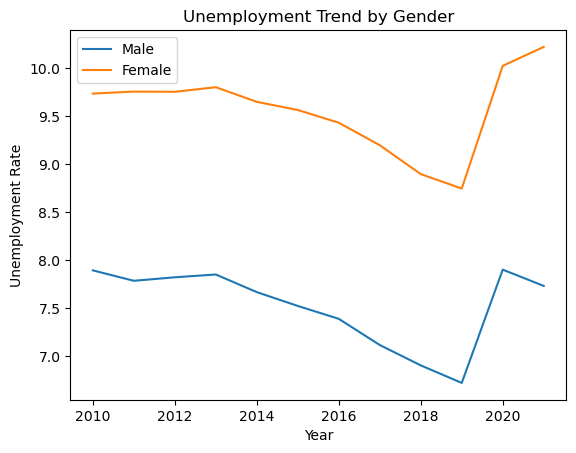

In [64]:
# Unemployment Trend by Gender
sns.lineplot(data =Unemployment_latest, x = 'Year', y='Unemployment (M)',label = 'Male', errorbar = None)
sns.lineplot(data =Unemployment_latest, x = 'Year', y='Unemployment (F)', label = 'Female', errorbar = None)
plt.legend(loc='upper left') 
plt.xlabel('Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Trend by Gender')
plt.savefig('Unemployment by Gender')
plt.show()


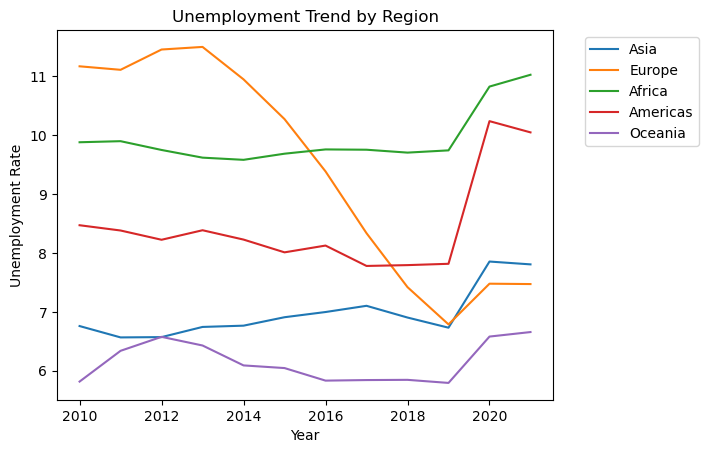

In [66]:
# Unemployment Trend by Region using the average male and female unemployment rates
sns.lineplot(data =Unemployment_latest, x = 'Year', y='Unemployment Rate',hue = 'region', errorbar = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Trend by Region')
plt.savefig('Unemployment_by_region', bbox_inches = 'tight')
plt.show()

In [67]:
# Select only for Africa
Unemployment_Africa = Unemployment_latest[Unemployment_latest['region'] == 'Africa']

In [68]:
Average_unemployment_rate = Unemployment_Africa.groupby('Entity')['Unemployment Rate'].mean().sort_values(ascending = False)
Average_unemployment_rate= Average_unemployment_rate.reset_index()

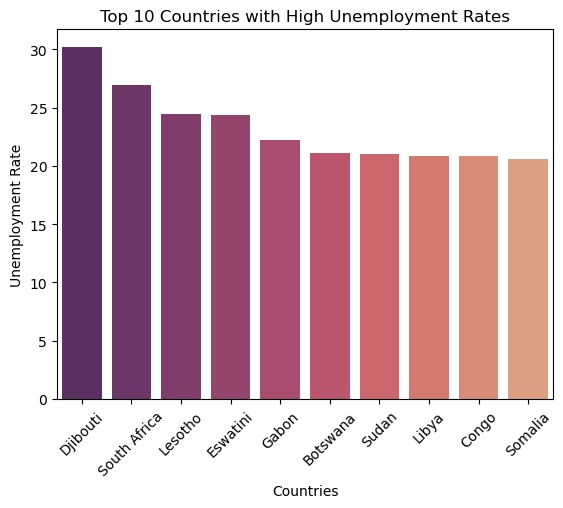

In [78]:
# Top 10 countries with high unemploment rates
sns.barplot(data = Average_unemployment_rate.head(10), x = 'Entity', y = 'Unemployment Rate', palette = "flare_r")
plt.xlabel('Countries')
plt.ylabel('Unemployment Rate')
plt.title('Top 10 Countries with High Unemployment Rates')
plt.xticks(rotation = 45)
plt.savefig('HighUnemploymentRates', bbox_inches = 'tight')
plt.show()

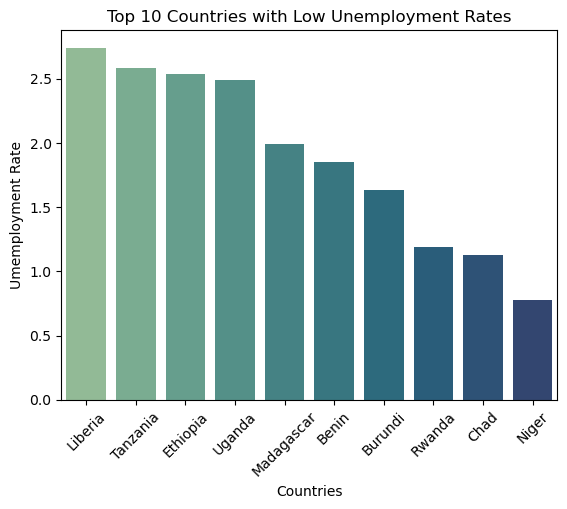

In [77]:
# Countries with low unemployment rates
sns.barplot(data = Average_unemployment_rate.tail(10), x = 'Entity', y= 'Unemployment Rate', palette = "crest")
plt.xlabel('Countries')
plt.ylabel('Umemployment Rate')
plt.title('Top 10 Countries with Low Unemployment Rates')
plt.xticks(rotation = 45)
plt.savefig('LowUnemploymentRates', bbox_inches = 'tight')
plt.show()

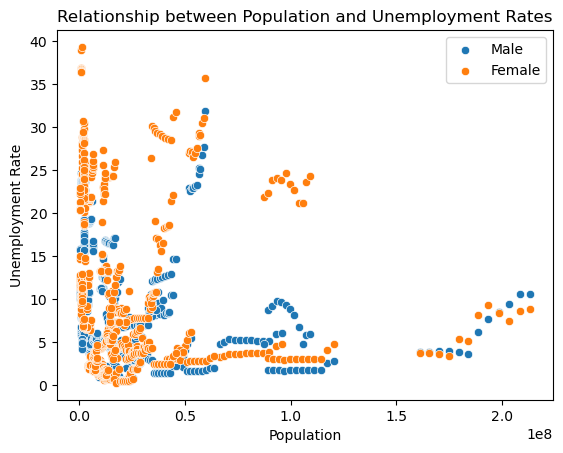

In [75]:
# Relationship between population and unemployment rate
sns.scatterplot(data = Unemployment_Africa, x = 'Population', y = 'Unemployment (M)', label = 'Male')
sns.scatterplot(data = Unemployment_Africa, x = 'Population', y = 'Unemployment (F)', label = 'Female')
plt.xlabel('Population')
plt.ylabel('Unemployment Rate')
plt.title('Relationship between Population and Unemployment Rates')
plt.savefig('Population Vs Unemployment')
plt.show()

## National Strategy for Youth Employment

In [76]:
Strategy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Entity      363 non-null    object
 1   Code        363 non-null    object
 2   Year        363 non-null    int64 
 3   Strategy    363 non-null    object
 4   region      363 non-null    object
 5   sub-region  363 non-null    object
dtypes: int64(1), object(5)
memory usage: 19.9+ KB


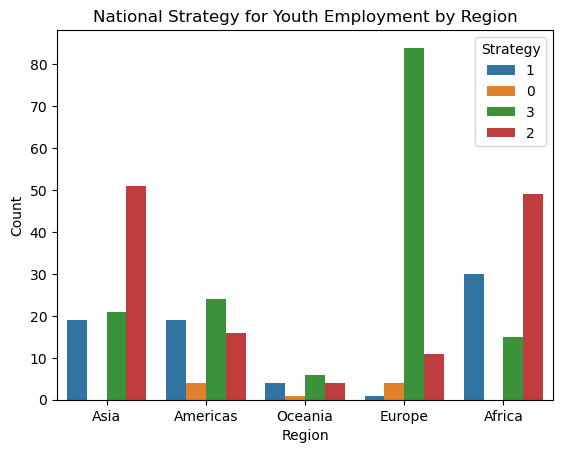

In [136]:
# National Strategy by Region
sns.countplot(data = Strategy_df, x = 'region', hue = 'Strategy')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('National Strategy for Youth Employment by Region')
plt.savefig('Strategy_by_region')
plt.show()

In [81]:
# select for countries where region is Africa
Strategy_Africa = Strategy_df[Strategy_df['region'] == 'Africa']

In [82]:
# select those that have operationalized the strategies
Strategy_operationalized = Strategy_Africa[Strategy_Africa['Strategy'] == '3']

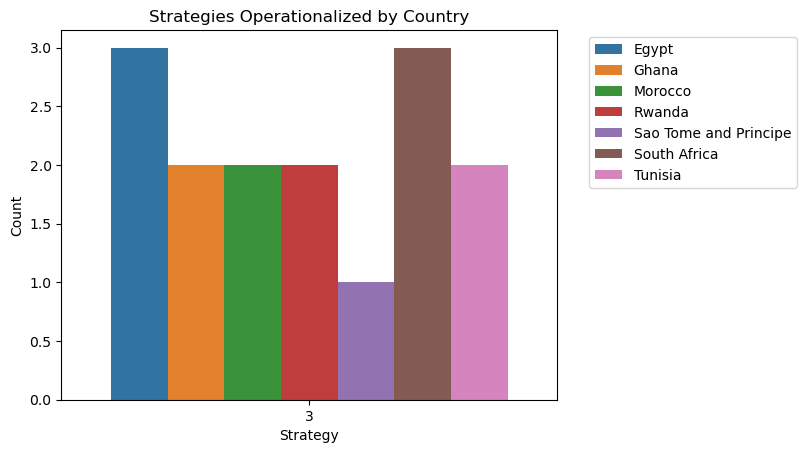

In [83]:
# strategies operationalized by country
sns.countplot(data = Strategy_operationalized, x = 'Strategy', hue = 'Entity')
plt.xlabel('Strategy')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Strategies Operationalized by Country')
plt.savefig('StrategiesOperationalized_by_Country', bbox_inches = 'tight')
plt.show()

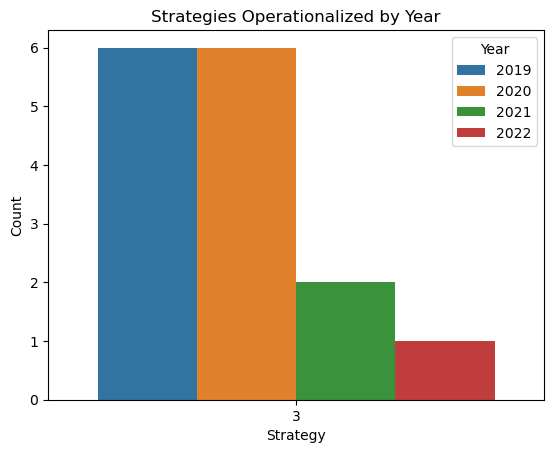

In [81]:
# Strategies Operationalized by Year
sns.countplot(data = Strategy_operationalized, x = 'Strategy', hue = 'Year')
plt.xlabel('Strategy')
plt.ylabel('Count')
plt.title('Strategies Operationalized by Year')
plt.savefig('Strategies Operationalized by year')
plt.show()

In [84]:
'''To Check how the operationalized strategies have improved unemployment rate, the countries with operationalized strategies 
   are selected from the unemployment dataframe starting from year 2018 above and saved as a dataframe'''

Strategy_unemployment = Unemployment_Africa[(Unemployment_Africa['Entity'] == 'South Africa')& (Unemployment_Africa['Year'] >=2018)
                        |(Unemployment_Africa['Entity'] == 'Egypt') & (Unemployment_Africa['Year'] >=2018)
                       |(Unemployment_Africa['Entity'] == 'Ghana') & (Unemployment_Africa['Year'] >=2018)
                        |(Unemployment_Africa['Entity'] == 'Morocco') & (Unemployment_Africa['Year'] >=2018)
                        |(Unemployment_Africa['Entity'] == 'Rwanda') & (Unemployment_Africa['Year'] >=2018)
                        |(Unemployment_Africa['Entity'] == 'Tunisia') & (Unemployment_Africa['Year'] >=2018)
                        |(Unemployment_Africa['Entity'] == 'Sao Tome and Principe') & (Unemployment_Africa['Year'] >=2018)]

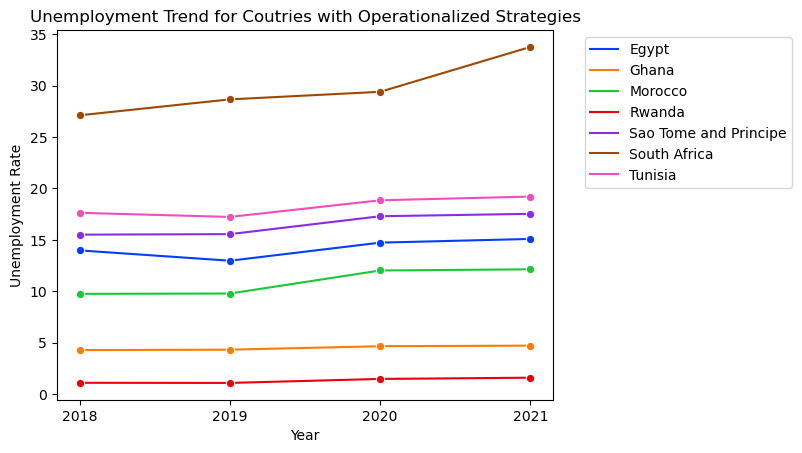

In [86]:
# Unemployment Trend for Coutries with Operationalized Strategies
sns.lineplot(data = Strategy_unemployment, x = 'Year', y = 'Unemployment Rate', hue = 'Entity', marker = 'o', palette = 'bright')
plt.xticks([2018, 2019, 2020, 2021]);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Trend for Coutries with Operationalized Strategies')
plt.savefig('Unemployment_Strategies', bbox_inches = 'tight')
plt.show()

## Share of Education in Government Expenditure

In [87]:
# Select those with years from 2010 and save as a dataframe
Education_expenditure = Education_df[Education_df['Year'] >= 2010]

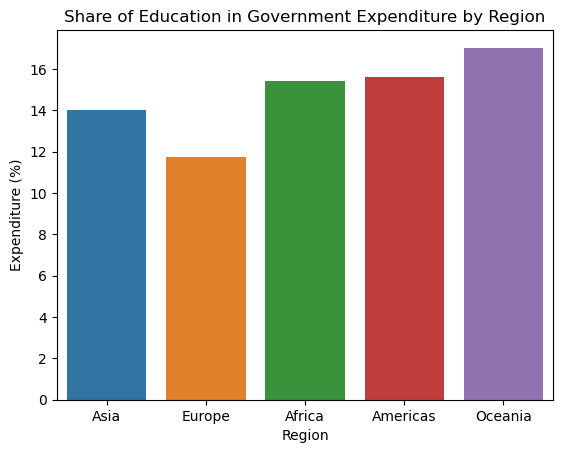

In [150]:
# Share of Education in Government Expenditure Trend by Region
sns.barplot(data = Education_expenditure, x = 'region', y = 'Expenditure', errorbar = None)
plt.xlabel('Region')
plt.ylabel('Expenditure (%)')
plt.title('Share of Education in Government Expenditure by Region')
plt.savefig('Share_of_education',bbox_inches = 'tight')
plt.show()

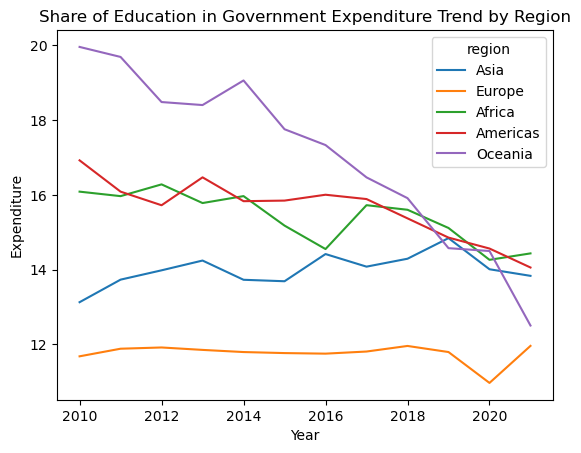

In [89]:
# Share of Education in Government Expenditure Trend by Region
sns.lineplot(data = Education_expenditure, x = 'Year', y = 'Expenditure', hue = 'region', errorbar = None)
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.title('Share of Education in Government Expenditure Trend by Region')
plt.savefig('expenditure_by_region',bbox_inches = 'tight')
plt.show()

In [90]:
# Share of Education in Government Expecnditure for Africa
Expenditure_africa = Education_expenditure[Education_expenditure['region'] == 'Africa']

In [91]:
# Average expenditure for each country in Africa
Average_expenditure = Expenditure_africa.groupby('Entity')['Expenditure'].mean().sort_values(ascending = False)
Average_expenditure = Average_expenditure.reset_index()

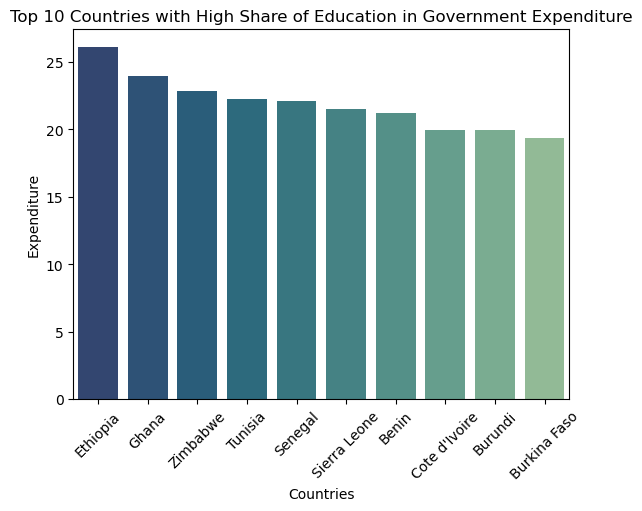

In [93]:
# Top 10 countries with high average share of education in government expenditure
sns.barplot(data = Average_expenditure.head(10), x = 'Entity', y = 'Expenditure', palette = 'crest_r')
plt.xlabel('Countries')
plt.ylabel('Expenditure')
plt.title('Top 10 Countries with High Share of Education in Government Expenditure')
plt.xticks(rotation = 45)
plt.savefig('High_share_in_expenditure', bbox_inches = 'tight')
plt.show()

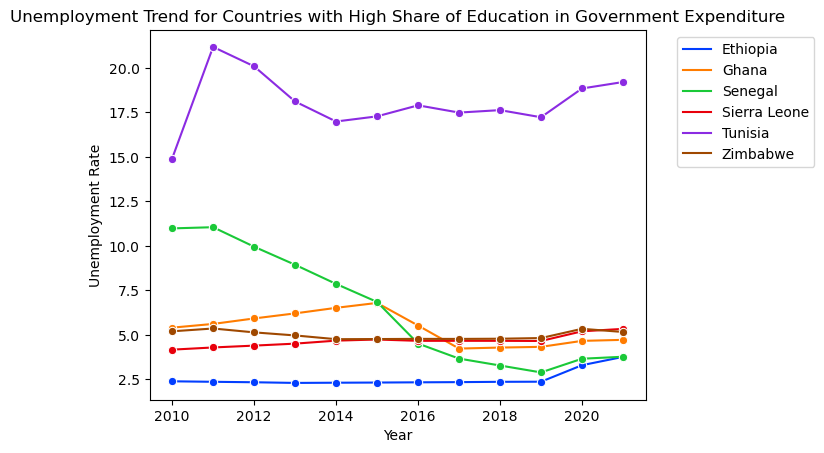

In [94]:
# select the unemployment rates for countries with high share of education in government expenditure
Expenditure_unemployment = Unemployment_Africa[(Unemployment_Africa['Entity'] == 'Ethiopia')
                        |(Unemployment_Africa['Entity'] == 'Zimbabwe')
                        |(Unemployment_Africa['Entity'] == 'Ghana')
                        |(Unemployment_Africa['Entity'] == 'Tunisia')
                        |(Unemployment_Africa['Entity'] == 'Senegal') 
                        |(Unemployment_Africa['Entity'] == 'Tunisia') 
                        |(Unemployment_Africa['Entity'] == 'Sierra Leone') ]

# Unemployment Trend for Coutries with High Share of Education in Government Expenditure
sns.lineplot(data = Expenditure_unemployment, x = 'Year', y = 'Unemployment Rate', hue = 'Entity', marker = 'o', palette = 'bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Trend for Countries with High Share of Education in Government Expenditure')
plt.savefig('UnemploymentRate_high_expenditure', bbox_inches = 'tight')
plt.show()

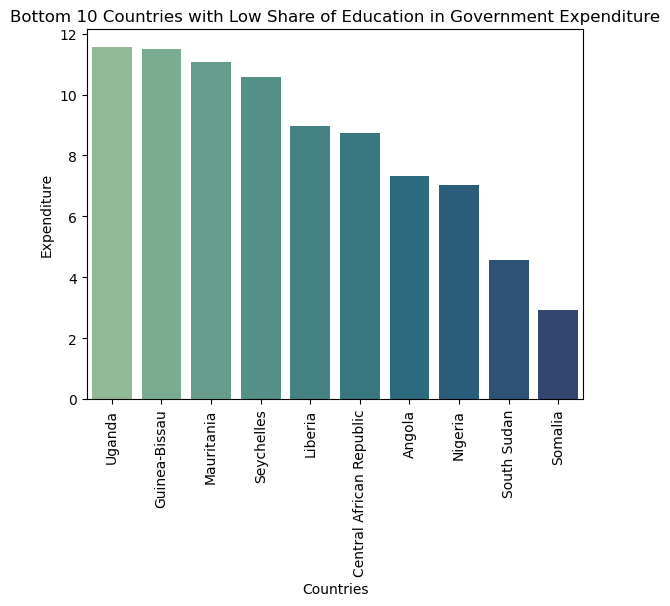

In [95]:
# Bottom 10 countries with Low average share of education in government expenditure
sns.barplot(data = Average_expenditure.tail(10), x = 'Entity', y = 'Expenditure', palette = 'crest')
plt.xlabel('Countries')
plt.ylabel('Expenditure')
plt.title('Bottom 10 Countries with Low Share of Education in Government Expenditure')
plt.xticks(rotation = 90)
plt.savefig('Low_share_in_government_expenditure', bbox_inches = 'tight')
plt.show()

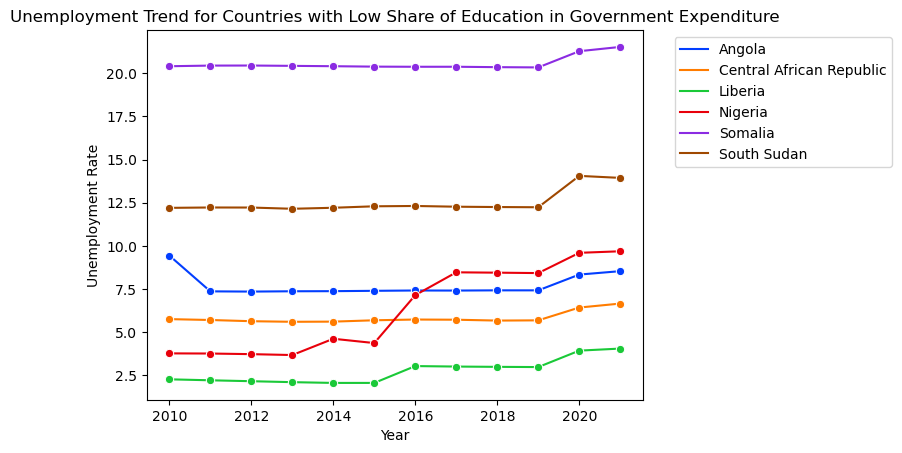

In [96]:
# select unemploymen rates for countries with low share of education in government expenditure
Expenditure_unemployment2 = Unemployment_Africa[(Unemployment_Africa['Entity'] == 'Somalia')
                        |(Unemployment_Africa['Entity'] == 'South Sudan')
                        |(Unemployment_Africa['Entity'] == 'Nigeria')
                        |(Unemployment_Africa['Entity'] == 'Angola')
                        |(Unemployment_Africa['Entity'] == 'Central African Republic') 
                         |(Unemployment_Africa['Entity'] == 'Seychelles')
                        |(Unemployment_Africa['Entity'] == 'Liberia') 
                        ]

# Unemployment Trend for Coutries with Low Share of Education in Government Expenditure
sns.lineplot(data = Expenditure_unemployment2, x = 'Year', y = 'Unemployment Rate', hue = 'Entity', marker = 'o', palette = 'bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Trend for Countries with Low Share of Education in Government Expenditure')
plt.savefig('UnemploymentRate_low_expenditure', bbox_inches = 'tight')
plt.show()

### Share of the Population with Access to Electricity

In [93]:
Electricity_df

,Entity,Code,Year,Access to electricity (% of population),region,sub-region
0,Afghanistan,AFG,2000,1.613591,Asia,Southern Asia
1,Afghanistan,AFG,2001,4.074574,Asia,Southern Asia
2,Afghanistan,AFG,2002,9.409158,Asia,Southern Asia
3,Afghanistan,AFG,2003,14.738506,Asia,Southern Asia
4,Afghanistan,AFG,2004,20.064968,Asia,Southern Asia
...,...,...,...,...,...,...
6228,Zimbabwe,ZWE,2016,42.561730,Africa,Sub-Saharan Africa
6229,Zimbabwe,ZWE,2017,44.178635,Africa,Sub-Saharan Africa
6230,Zimbabwe,ZWE,2018,45.572647,Africa,Sub-Saharan Africa
6231,Zimbabwe,ZWE,2019,46.781475,Africa,Sub-Saharan Africa


In [97]:
# Select from the year 2010 above
ElectricityAccess = Electricity_df[Electricity_df['Year'] >= 2010]

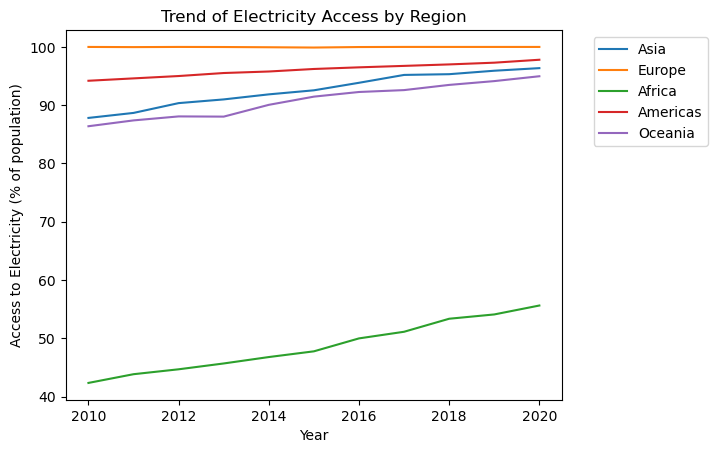

In [98]:
# Trend of Population with Access to electricity by region
sns.lineplot(data =ElectricityAccess, x = 'Year', y= 'Access to electricity (% of population)', hue = 'region', errorbar = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Access to Electricity (% of population)')
plt.title('Trend of Electricity Access by Region')
plt.savefig('ElectricityAccess_by_region', bbox_inches = 'tight')
plt.show()

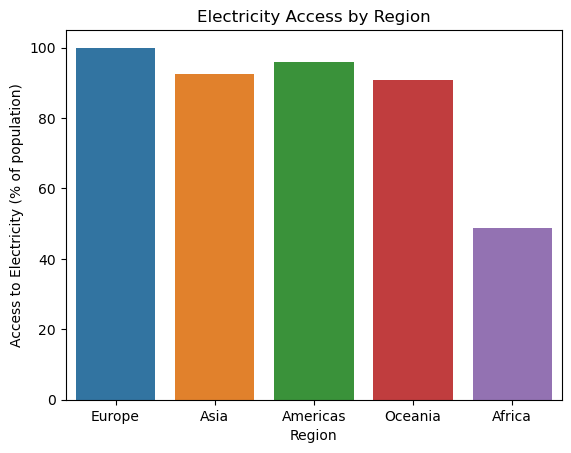

In [148]:
sns.barplot(data =ElectricityAccess.sort_values(by = 'Access to electricity (% of population)', ascending = False), x = 'region', y= 'Access to electricity (% of population)', errorbar = None)
plt.xlabel('Region')
plt.ylabel('Access to Electricity (% of population)')
plt.title('Electricity Access by Region')
plt.savefig('Electricity_by_region', bbox_inches = 'tight')
plt.show()

In [99]:
# Access to electricity in Africa
ElectricityAccessAfrica = ElectricityAccess[ElectricityAccess['region'] == 'Africa']

In [100]:
# Average percentage of population with access to electricity in Africa
Average_electAccess = ElectricityAccessAfrica.groupby('Entity')['Access to electricity (% of population)'].mean().sort_values(ascending = False)
Average_electAccess = Average_electAccess.reset_index()

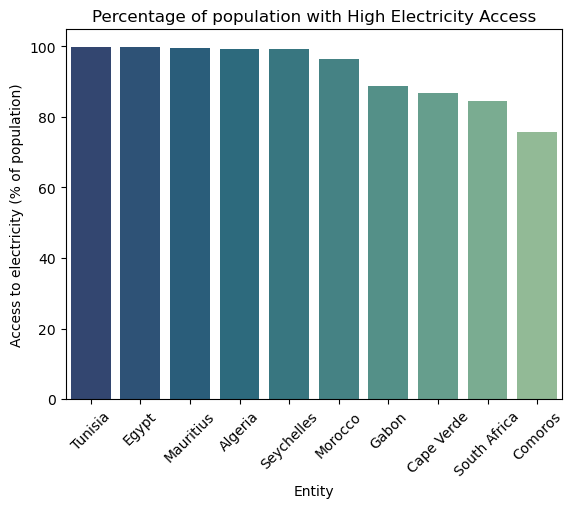

In [116]:
# Top 10 Countries with High share of population with access to electricity
sns.barplot(data = Average_electAccess.head(10), x = 'Entity', y= 'Access to electricity (% of population)', errorbar = None, palette = 'crest_r')
plt.xlabel('Entity')
plt.ylabel('Access to electricity (% of population)')
plt.title('Percentage of population with High Electricity Access')
plt.xticks(rotation = 45)
plt.savefig('High_electricity_access', bbox_inches = 'tight')
plt.show()

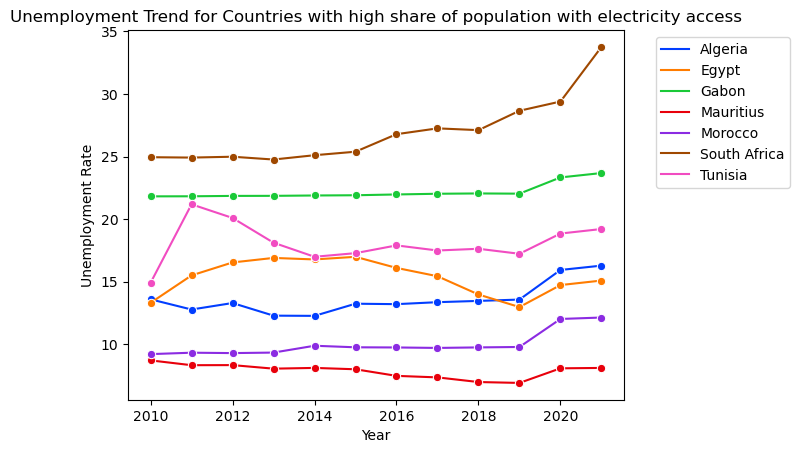

In [102]:
# select unemployment rates for countries with high share of population in with electricity access
Electricity_access1 = Unemployment_Africa[(Unemployment_Africa['Entity'] == 'Tunisia')
                        |(Unemployment_Africa['Entity'] == 'Egypt')
                        |(Unemployment_Africa['Entity'] == 'Mauritius')
                        |(Unemployment_Africa['Entity'] == 'Algeria')
                        |(Unemployment_Africa['Entity'] == 'Morocco') 
                         |(Unemployment_Africa['Entity'] == 'South Africa')
                        |(Unemployment_Africa['Entity'] == 'Gabon') 
                        ]

# Unemployment Trend for Coutries with high share of population in with electricity access
sns.lineplot(data = Electricity_access1, x = 'Year', y = 'Unemployment Rate', hue = 'Entity', marker = 'o', palette = 'bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Trend for Countries with high share of population with electricity access')
plt.savefig('UnemploymentRate_high_electricity_access', bbox_inches = 'tight')
plt.show()

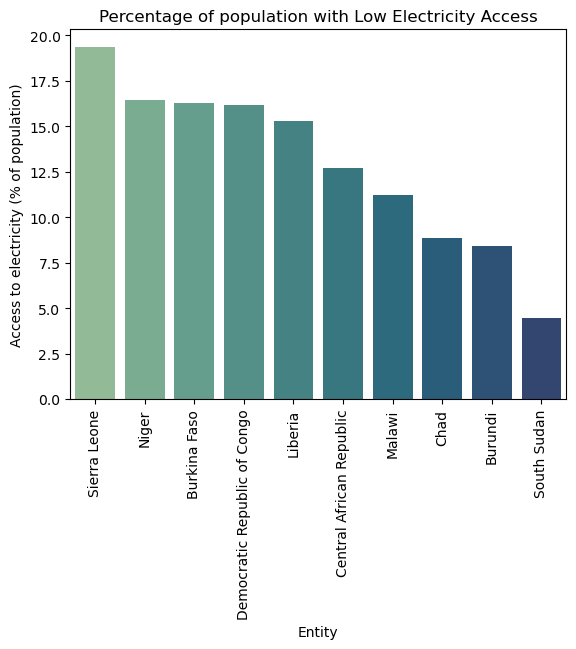

In [103]:
# Top 10 Countries with Low share of population with access to electricity
sns.barplot(data = Average_electAccess.tail(10), x = 'Entity', y= 'Access to electricity (% of population)', errorbar = None, palette = 'crest')
plt.xlabel('Entity')
plt.ylabel('Access to electricity (% of population)')
plt.title('Percentage of population with Low Electricity Access')
plt.xticks(rotation = 90)
plt.savefig('Low_electricity_access', bbox_inches = 'tight')
plt.show()

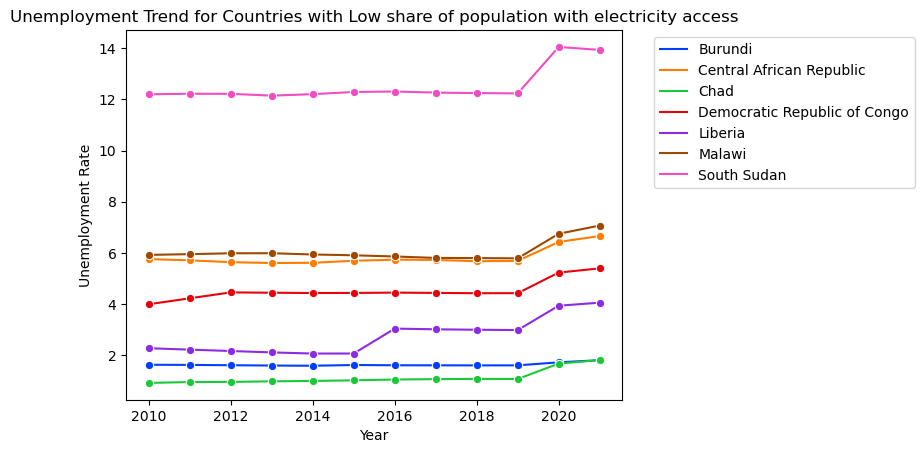

In [104]:
# select unemployment rates for countries with low share of population with electricity access
Electricity_access2 = Unemployment_Africa[(Unemployment_Africa['Entity'] == 'South Sudan')
                        |(Unemployment_Africa['Entity'] == 'Burundi')
                        |(Unemployment_Africa['Entity'] == 'Chad')
                        |(Unemployment_Africa['Entity'] == 'Malawi')
                        |(Unemployment_Africa['Entity'] == 'Central African Republic') 
                         |(Unemployment_Africa['Entity'] == 'Liberia')
                        |(Unemployment_Africa['Entity'] == 'Democratic Republic of Congo') 
                        ]

# Unemployment Trend for Coutries with low share of population with electricity access
sns.lineplot(data = Electricity_access2, x = 'Year', y = 'Unemployment Rate', hue = 'Entity', marker = 'o', palette = 'bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Trend for Countries with Low share of population with electricity access')
plt.savefig('UnemploymentRate_low_electricity_access', bbox_inches = 'tight')
plt.show()

### Number of Firms

In [105]:
# select for the year 2010 above
Firms_latest = Firms_df[Firms_df['Year'] >= 2010]

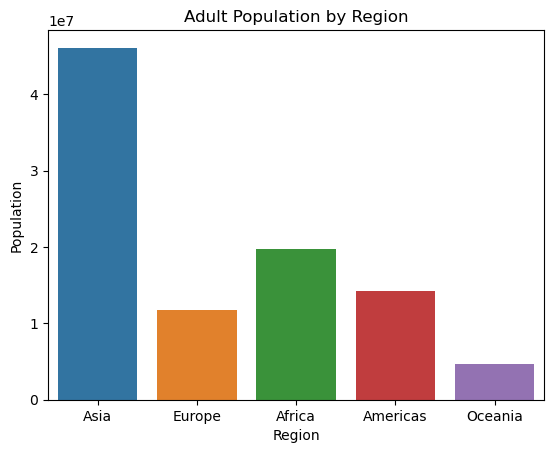

In [138]:
sns.barplot(data = Firms_latest, x= 'region', y= 'Adult population', errorbar = None)
plt.xlabel('Region')
plt.ylabel('Population')
plt.title('Adult Population by Region')
plt.savefig('AdultPop_by_region', bbox_inches = 'tight')
plt.show()

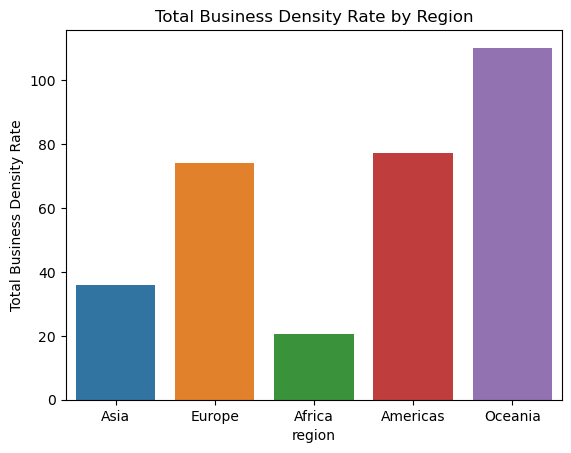

In [135]:
sns.barplot(data = Firms_latest, x= 'region', y= 'Total business density rate', errorbar = None)
plt.ylabel('Total Business Density Rate')
plt.title('Total Business Density Rate by Region')
plt.savefig('TBDR_by_region', bbox_inches = 'tight')
plt.show()

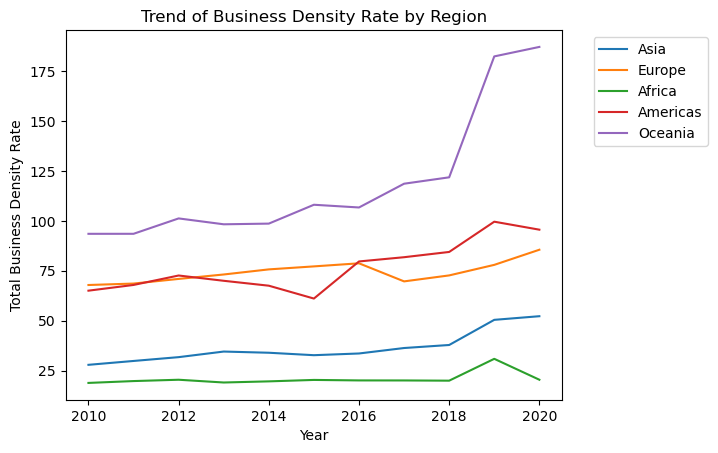

In [106]:
# Trend of business density rate by region
sns.lineplot(data = Firms_latest, x= 'Year', y= 'Total business density rate', hue = 'region', errorbar = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Total Business Density Rate')
plt.title('Trend of Business Density Rate by Region')
plt.savefig('BDR_by_region', bbox_inches = 'tight')
plt.show()

In [107]:
# Select the rows where region is Africa
Firms_Africa = Firms_latest[Firms_latest['region'] == 'Africa']

In [108]:
# Obtain the average for each country in Africa
Average_firms= Firms_Africa.groupby('Economy')['Number of Companies','Adult population','Total business density rate'].mean()
Average_firms = Average_firms.reset_index().sort_values(by = 'Total business density rate', ascending = False)

C:\Users\HP\AppData\Local\Temp\ipykernel_1904\3500992417.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Average_firms= Firms_Africa.groupby('Economy')['Number of Companies','Adult population','Total business density rate'].mean()


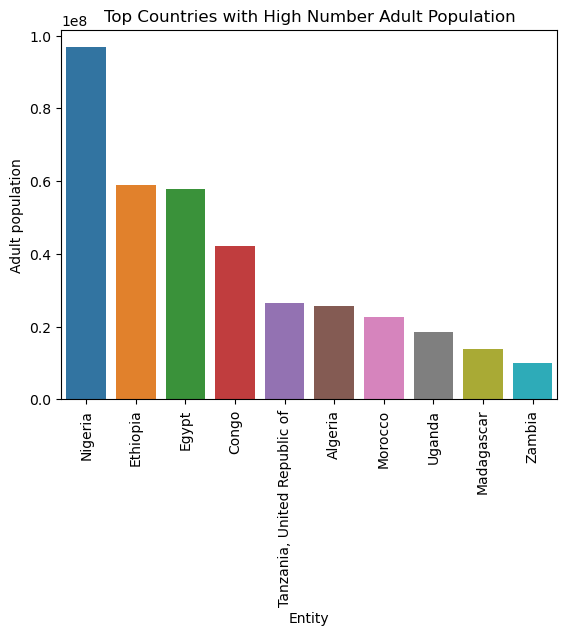

In [174]:
sns.barplot(data = Average_firms.reset_index().sort_values(by = 'Adult population', ascending = False).head(10), x = 'Entity', y = 'Adult population' )

plt.title('Top Countries with High Number Adult Population')
plt.xticks(rotation = 90);

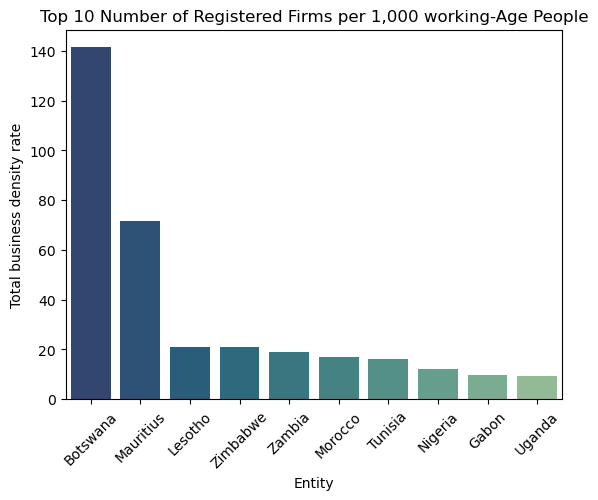

In [109]:
# Top 10 Countries with High business density rate
sns.barplot(data = Average_firms.head(10), x = 'Economy', y= 'Total business density rate', errorbar = None, palette = 'crest_r')
plt.xlabel('Entity')
plt.ylabel('Total business density rate')
plt.title('Top 10 Number of Registered Firms per 1,000 working-Age People')
plt.xticks(rotation = 45)
plt.savefig('High_BDR', bbox_inches = 'tight')
plt.show()

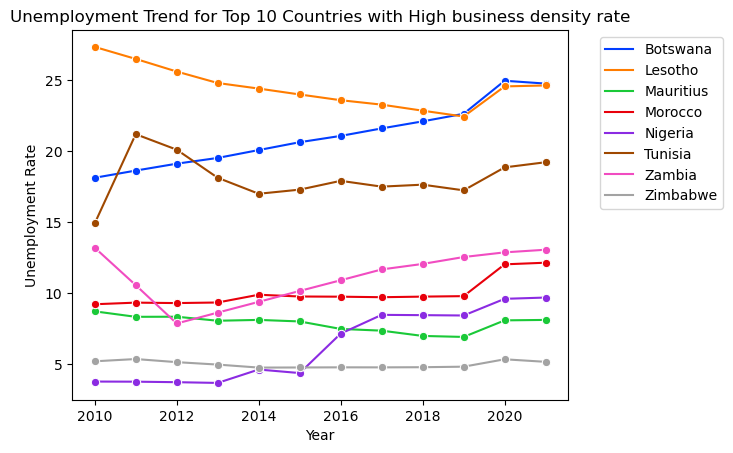

In [110]:
# select unemployment rates for countries with High Business Density Rate
Firms_unemployment1 = Unemployment_Africa[(Unemployment_Africa['Entity'] == 'Botswana')
                        |(Unemployment_Africa['Entity'] == 'Mauritius')
                        |(Unemployment_Africa['Entity'] == 'Lesotho')
                        |(Unemployment_Africa['Entity'] == 'Zimbabwe')
                        |(Unemployment_Africa['Entity'] == 'Zambia') 
                         |(Unemployment_Africa['Entity'] == 'Morocco')
                        |(Unemployment_Africa['Entity'] == 'Tunisia') 
                        |(Unemployment_Africa['Entity'] == 'Nigeria')                   
                        ]

# Unemployment Trend for Coutries with High Business Density Rate
sns.lineplot(data = Firms_unemployment1, x = 'Year', y = 'Unemployment Rate', hue = 'Entity', marker = 'o', palette = 'bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Trend for Top 10 Countries with High business density rate')
plt.savefig('UnemploymentRate_high_BDR', bbox_inches = 'tight')
plt.show()

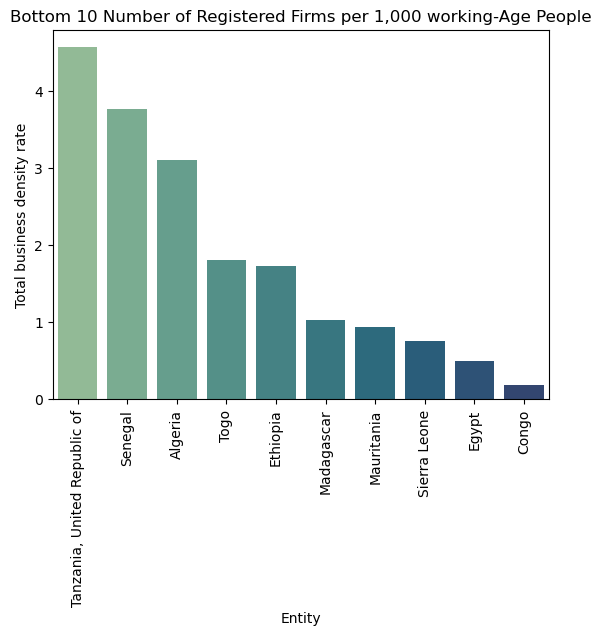

In [111]:
# Bottom 10 Countries with Low business density rate
sns.barplot(data = Average_firms.tail(10), x = 'Economy', y= 'Total business density rate', errorbar = None, palette = 'crest')
plt.xlabel('Entity')
plt.ylabel('Total business density rate')
plt.title('Bottom 10 Number of Registered Firms per 1,000 working-Age People')
plt.xticks(rotation = 90)
plt.savefig('Low_BDR', bbox_inches = 'tight')
plt.show()

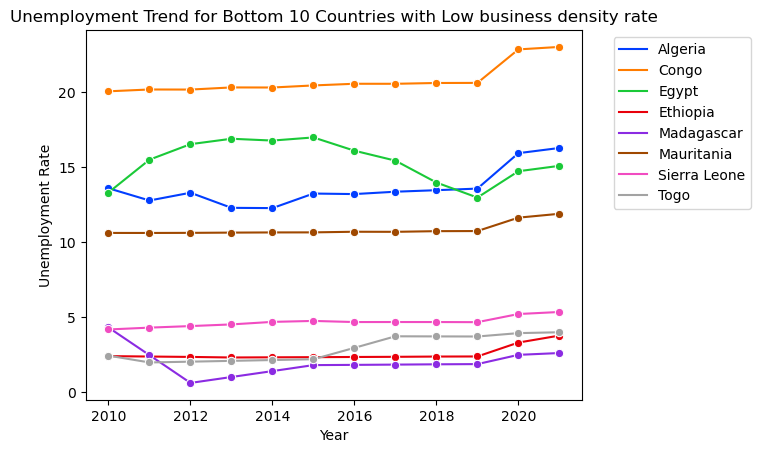

In [112]:
# select unemployment rates for countries with Low Business Density Rate
Firms_unemployment2 = Unemployment_Africa[(Unemployment_Africa['Entity'] == 'Congo')
                        |(Unemployment_Africa['Entity'] == 'Egypt')
                        |(Unemployment_Africa['Entity'] == 'Sierra Leone')
                        |(Unemployment_Africa['Entity'] == 'Mauritania')
                        |(Unemployment_Africa['Entity'] == 'Madagascar') 
                         |(Unemployment_Africa['Entity'] == 'Ethiopia')
                        |(Unemployment_Africa['Entity'] == 'Togo') 
                        |(Unemployment_Africa['Entity'] == 'Algeria')                   
                        ]

# Unemployment Trend for Coutries with Low Business Density Rate
sns.lineplot(data = Firms_unemployment2, x = 'Year', y = 'Unemployment Rate', hue = 'Entity', marker = 'o', palette = 'bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Trend for Bottom 10 Countries with Low business density rate')
plt.savefig('UnemploymentRate_low_BDR', bbox_inches = 'tight')
plt.show()

### Relationships between the Variables

In [113]:
'''Relationships between Unemployment rate, access to electricity, share of education in government expenditure, 
   number of firms and population. This would be achieved by merging the dataframes and check their correlations'''

Average_firms.rename(columns = {'Economy':'Entity'}, inplace = True)

Merged_df = Average_unemployment_rate.merge(Average_expenditure, on = 'Entity', how = 'inner')
Merged_df = Merged_df.merge(Average_electAccess, on = 'Entity', how = 'inner')
Merged_df = Merged_df.merge(Average_firms, on = 'Entity', how = 'inner')

In [114]:
# Using Pearson Correlation
Corr_matrix = Merged_df.corr(numeric_only=True)

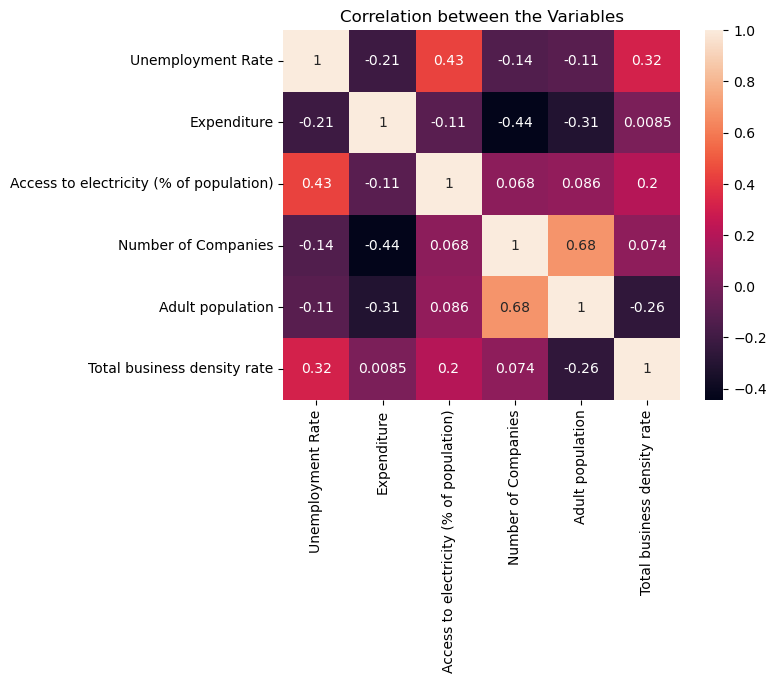

In [115]:
sns.heatmap(data =Corr_matrix, annot = True )
plt.title('Correlation between the Variables')
plt.savefig('Heatmap', bbox_inches = 'tight')
plt.show()

In [305]:
Corr_matrix

,Unemployment Rate,Expenditure,Access to electricity (% of population),Number of Companies,Adult population,Total business density rate
Unemployment Rate,1.000000,-0.208049,0.430803,-0.136461,-0.113949,0.315482
Expenditure,-0.208049,1.000000,-0.107006,-0.442794,-0.310023,0.008541
Access to electricity (% of population),0.430803,-0.107006,1.000000,0.067833,0.085843,0.202961
Number of Companies,-0.136461,-0.442794,0.067833,1.000000,0.679482,0.074199
Adult population,-0.113949,-0.310023,0.085843,0.679482,1.000000,-0.261751
Total business density rate,0.315482,0.008541,0.202961,0.074199,-0.261751,1.000000


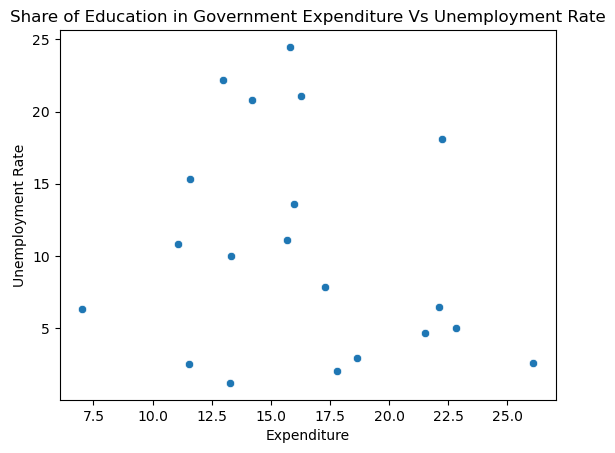

In [312]:
# Relationship between Share of education in government expenditure and unemployment
sns.scatterplot(data = Merged_df, x = 'Expenditure', y= 'Unemployment Rate')
plt.title('Share of Education in Government Expenditure Vs Unemployment Rate')
plt.show()

<Axes: xlabel='Access to electricity (% of population)', ylabel='Unemployment Rate'>

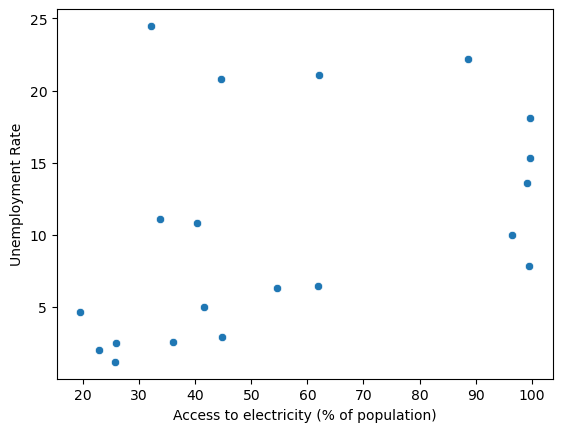

In [310]:

sns.scatterplot(data = Merged_df, x = 'Access to electricity (% of population)', y= 'Unemployment Rate')

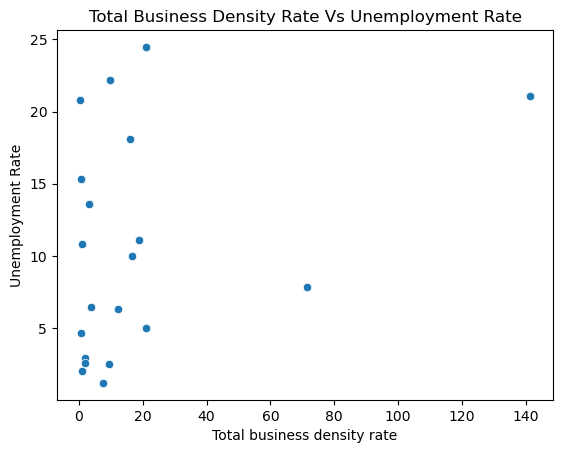

In [313]:
sns.scatterplot(data = Merged_df, x = 'Total business density rate', y= 'Unemployment Rate')
plt.title('Total Business Density Rate Vs Unemployment Rate')
plt.show()

In [139]:
Merged_df

,Entity,Unemployment Rate,Expenditure,Access to electricity (% of population),Number of Companies,Adult population,Total business density rate
0,Lesotho,24.485458,15.808920,32.166666,2.689291e+04,1.271758e+06,20.991962
1,Gabon,22.187708,12.989313,88.637787,1.118044e+04,1.116480e+06,9.804565
2,Botswana,21.091333,16.255996,62.100939,1.816951e+05,1.306972e+06,141.511613
3,Congo,20.819542,14.185805,44.537416,8.002667e+03,4.209665e+07,0.186716
4,Tunisia,18.073917,22.242765,99.790909,1.220070e+05,7.625947e+06,15.941495
5,Egypt,15.361667,11.585327,99.772464,2.969156e+04,5.795038e+07,0.499855
6,Algeria,13.608875,15.996980,99.252291,7.984478e+04,2.560345e+07,3.105540
7,Zambia,11.070833,15.678026,33.784166,1.856270e+05,9.899869e+06,18.750450
8,Mauritania,10.846042,11.070532,40.276024,2.284667e+03,2.425093e+06,0.933893
9,Morocco,9.998250,13.334797,96.538939,3.852166e+05,2.277113e+07,16.749196
